In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [ ]:
#Valores dados

#Presión
P0 = 1 #atm
#Peso molecular del aire
M = 0.0288 #kg/mol
#Gravedad
g = 9.8 #m/s
#Constante de Boltzmann
k = 1.3805E-23 #J/K
#Temperatuta de la atmosfera
T =  #kelvin
#Número de abogadro
NA = 6.0225E23 

In [23]:
#Densidad
rho_0 = 1.29 #kg/m^3
#Parámetro
lambd = 7482.2 #m


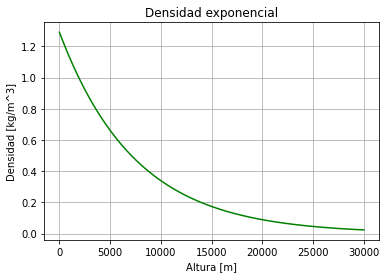

In [43]:
#NUMERAL 1 ,  DENSIDAD EN FUNCIOND DE LA ALTURA
densidad = lambda y: rho_0 * np.exp(-(y/lambd))

#Gráfico
x = np.linspace(0,30000,100)
plt.figure()
plt.plot(x , densidad(x),"g-")
plt.xlabel("Altura [m]")
plt.ylabel("Densidad [kg/m^3]")
plt.title("Densidad exponencial")
plt.grid()


In [107]:
#NUMERAL 2, parámetros

m = 60 #kg
A = 0.3 #m^2
h = np.linspace(30,70,5) #km
g = 9.8 #m/s^2
k = 1
k_0 = 0.5 * rho_0 * A * k
h = np.linspace(30,70,5)
#Condiciones Iniciales
v_0 = 0
x_0 = 0
x0 = np.array([x_0, v_0])
#Parametros
params = [m, k_0, lambd, g]

In [128]:
# TRANSFORMAMOS AL EDO EN 2 EDO
def func(x,t,params):
  g = params[3]
  m = params[0]
  k_0 = params[1]
  lamd = params[2]

  dxdt = x[1]
  dvdt = -m*g + k_0 * (x[1]**2) * np.exp (-x[0]/lambd)
  return [dxdt, dvdt]

t = np.linspace(0, 500, 10000) #Tiempo de integración
x = integrate.odeint(func, x0 ,t, args = (params, ))

In [129]:
#Solucion para varios valores de h:
i = 0
while i< len(h):
  K = h[i]
  print("Para h = ",h[i]," x = ", x[K])
  i = i+1


IndexError: ignored

Text(0.5, 1.0, 'Velocidad en función del tiempo')

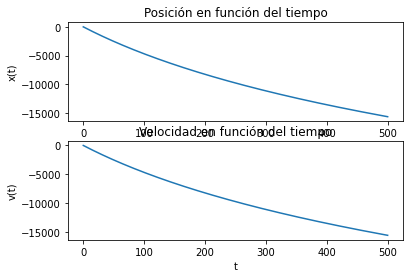

In [130]:
#NUMERAL 3, GRAFICO
x1 = x[:,0]
x2 = x[:,1]
plt.figure()
plt.subplot(211)
plt.plot(t,x1) #posicion en funcion del tiempo
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Posición en función del tiempo")
plt.subplot(212)
plt.plot(t,x1) #velociad en funcion del tiempo
plt.xlabel("t")
plt.ylabel("v(t)")
plt.title("Velocidad en función del tiempo")


No handles with labels found to put in legend.


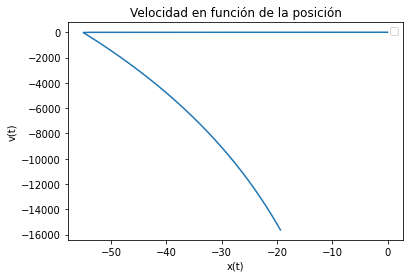

In [131]:
plt.figure()
plt.plot(x2,x1) #velociad en funcion de la posición
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.title("Velocidad en función de la posición")
plt.legend()